<a href="https://www.kaggle.com/code/shekharbanerjee/skb-fashion-mnist?scriptVersionId=180960618" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
!pip install idx2numpy

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7905 sha256=690c4e3039a9f48b142727219bce913142c0d3d498b63c91bf4fdb4a14c0ebd1
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy


In [3]:
import idx2numpy

train = '/kaggle/input/fashionmnist/train-images-idx3-ubyte'
train = idx2numpy.convert_from_file(train)

test = '/kaggle/input/fashionmnist/t10k-images-idx3-ubyte'
test = idx2numpy.convert_from_file(test)


In [4]:
train.shape , test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
train_labels = '/kaggle/input/fashionmnist/train-labels-idx1-ubyte'
train_labels = idx2numpy.convert_from_file(train_labels)

test_labels = '/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte'
test_labels = idx2numpy.convert_from_file(test_labels)


In [6]:
train_labels.shape , test_labels.shape

((60000,), (10000,))

In [7]:
class_names = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_labels_real = [class_names[x] for x in train_labels]

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

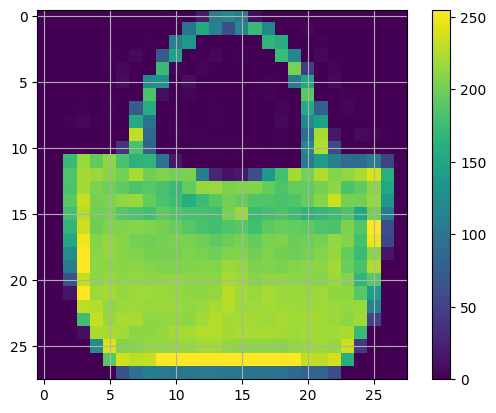

In [9]:
plt.figure()
plt.imshow(train[100])

plt.colorbar()
plt.grid(True)
plt.show()

In [10]:
train = train / 255
test = test / 255

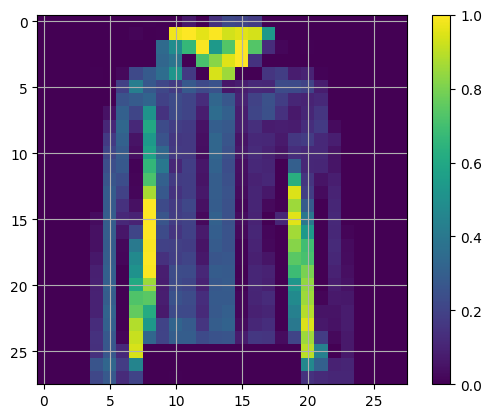

In [11]:
plt.figure()
plt.imshow(test[6])
plt.colorbar()
plt.grid(True)
plt.show()

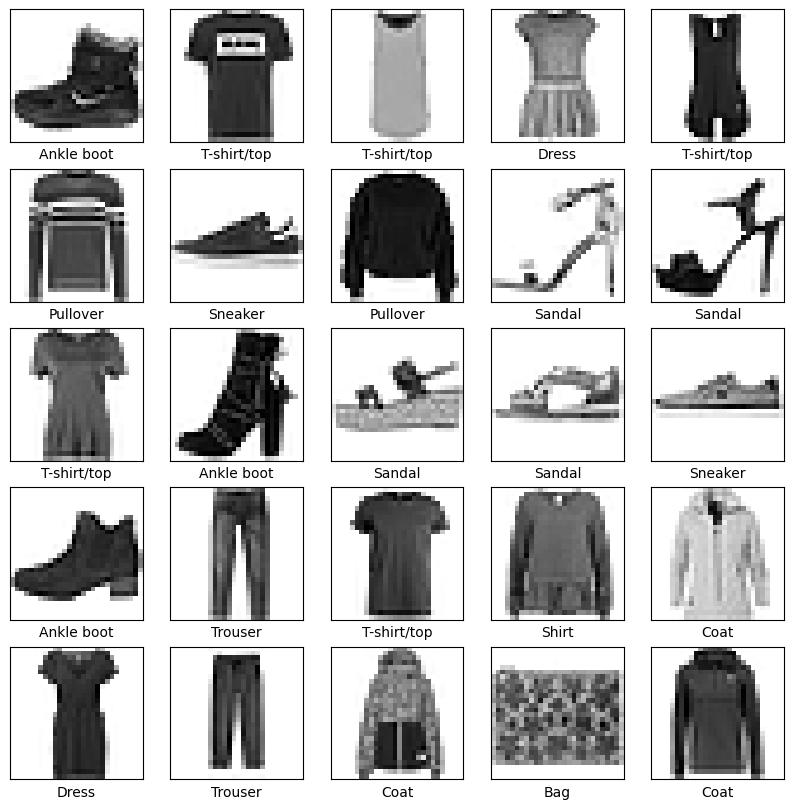

In [12]:
plt.figure(figsize = (10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train[i],cmap = plt.cm.binary)
    plt.xlabel(train_labels_real[i])
plt.show()

In [13]:
import tensorflow as tf

from tensorflow import keras

from keras import Sequential

from keras.layers import Dense , BatchNormalization , Dropout , Flatten , Conv2D , MaxPooling2D

from keras.callbacks import EarlyStopping



2024-06-01 16:21:32.460015: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-01 16:21:32.460112: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-01 16:21:32.570136: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [14]:
model = Sequential()

model.add(Conv2D(16,kernel_size = (3,3) , padding = 'valid' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2) , strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size = (3,3), padding = "valid" , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2) ,  strides = 2 , padding = 'valid'))

model.add(Flatten())

model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,322 (122.35 KB)

 Trainable params: 31,226 (121.98 KB)

 Non-trainable params: 96 (384.00 B)

In [15]:
callback = EarlyStopping(monitor = "val_loss",
                         min_delta = 0.01,
                         patience = 20, verbose = 1,
                         mode = "auto",
                         baseline = None,
                         restore_best_weights = True,
                        )

model.compile(optimizer = 'adam',loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

history = model.fit(train,
                    train_labels,
                    epochs=100,
                    validation_data=(test,test_labels),
                    batch_size=32,
                    callbacks=callback)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-06-01 16:21:46.347565: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.23455, expected 1.00508
2024-06-01 16:21:46.347611: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.23285, expected 1.00338
2024-06-01 16:21:46.347622: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 26: 1.20628, expected 0.976813
2024-06-01 16:21:46.347629: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 27: 1.05634, expected 0.826866
2024-06-01 16:21:46.347637: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 53: 1.18824, expected 0.95877
2024-06-

  70/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4106 - loss: 1.7227

I0000 00:00:1717258908.489885     121 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1862/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7787 - loss: 0.6538

2024-06-01 16:21:53.771243: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 677: 1.93615, expected 1.54727
2024-06-01 16:21:53.771306: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 678: 1.93515, expected 1.54626
2024-06-01 16:21:53.771316: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 681: 2.836, expected 2.44712
2024-06-01 16:21:53.771323: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 686: 2.38662, expected 1.99773
2024-06-01 16:21:53.771331: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 687: 2.77131, expected 2.38243
2024-06-01 16:21:53.771339: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 700: 2.81415, expected 2.42527
2024-06-01 16:21:53.771346: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 701: 2.52469, expected 2.13581
2024-06-01 16:21:53.771354: E external/loca

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7792 - loss: 0.6523 - val_accuracy: 0.8735 - val_loss: 0.3483
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8873 - loss: 0.3052 - val_accuracy: 0.8790 - val_loss: 0.3350
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9049 - loss: 0.2578 - val_accuracy: 0.8928 - val_loss: 0.2959
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9148 - loss: 0.2325 - val_accuracy: 0.8958 - val_loss: 0.2861
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9188 - loss: 0.2169 - val_accuracy: 0.8967 - val_loss: 0.2887
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9239 - loss: 0.2036 - val_accuracy: 0.8914 - val_loss: 0.2979
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9315 - loss: 0.1830 - val_accuracy: 0.8930 - val_loss: 0.3041
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9345 - loss: 0.1747 - val

In [16]:
model.save('fmist.keras')

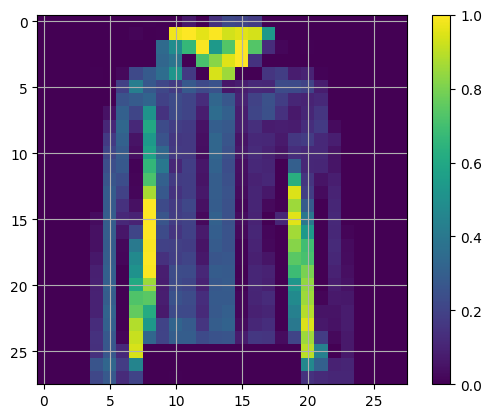

In [17]:
plt.figure()
plt.imshow(test[6])
plt.colorbar()
plt.grid(True)
plt.show()

In [18]:
class_names[6]

'Shirt'

In [19]:
class_names[np.argmax(model.predict(train[2].reshape([1,28,28])))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


'T-shirt/top'